In [7]:
import os
import json
import h5py
import random
import operator
import collections
import numpy as np
from PIL import Image


import cv2
import skimage.measure
from skimage.transform import resize

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn.functional as F

In [22]:

flow_h5_dir = '/home/salik/ExtractedFlowH5_test/'
videoname = 'S008C001P001R001A002'
#frame_indices = [0,1,2,3,4,5]

flow_h5_path = os.path.join(flow_h5_dir, videoname + '_3dflow.h5')
flow_h5 = h5py.File(flow_h5_path, 'r', libver='latest', swmr=True)
#####flows = []
flowsActual = []
for f in flow_h5['flow']:
    #flow = cropND(f, (self.side_size // self.patch_size, self.side_size // self.patch_size, 3)) # centercrop
    #flow = skimage.measure.block_reduce(f, (8,8), np.mean)
    flowActual = torch.from_numpy(f)
    #flowActual = cropND(flowActual, (self.side_size, self.side_size, 3))
    #flowActual = resize(flowActual, (224, 224))
    flowActual = np.transpose(flowActual, (2,0,1)) 
    #flowActual[flowActual <0.005] = 0
    flowActual = flowActual * 50
    #flowActual = self.flow_transform(flowActual)
    #flow = torch.from_numpy(f)


    ##### Resize operation using interpolate on tensors
    #'''flow = np.transpose(flow, (2, 0, 1))
    #flow = F.interpolate(flow, self.side_size // self.patch_size)
    #flow = np.transpose(flow, (2, 0, 1))
    #flow = F.interpolate(flow, self.side_size // self.patch_size)
    #flow = np.transpose(flow, (1,0,2))'''
    ######################
    #####flow = np.transpose(flow, (2,0,1))

    #flowActual[flowActual != 0] = flowActual[flowActual != 0] + 3.1465
    ##flowActual = flowActual + 3.1465
    #####flow = flow * 1000 # multiply 50 to "keep proper scale" according to [1]
    flowsActual.append(torch.FloatTensor(flowActual))
    #####flows.append(torch.FloatTensor(flow))
#####flows = torch.stack(flows)
flowsActual = torch.stack(flowsActual)
    
    

In [23]:
flowsActual.shape

torch.Size([88, 3, 224, 224])

In [24]:
import numpy as np
import cv2 as cv
#import imageio
import glob
import matplotlib.pyplot as plt

#plot images as an animated video
import matplotlib.animation as animation
#%matplotlib inline

def visualize_3dflow(flowsActual,out_folder_vis):
    fig = plt.figure(figsize=(15,10))
    ims=[]
    images = []

    for flow in flowsActual:
        img = np.transpose(flow.numpy(), (1,2,0))
        #img = cv.imread(paths,cv.IMREAD_COLOR)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        #print(np.shape(img))
        im = plt.imshow(img, animated=True)
        ims.append([im])
    
    print(np.shape(ims))
    print(str(np.shape(img)))


    ani = animation.ArtistAnimation(fig, ims, interval=41, blit=True,
                                   repeat_delay=1000,repeat=True)
    #ani.save(out_folder_vis)

    
    writergif = animation.PillowWriter(fps=30) 
    ani.save(out_folder_vis, writer=writergif)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(88, 1)
(224, 224, 3)


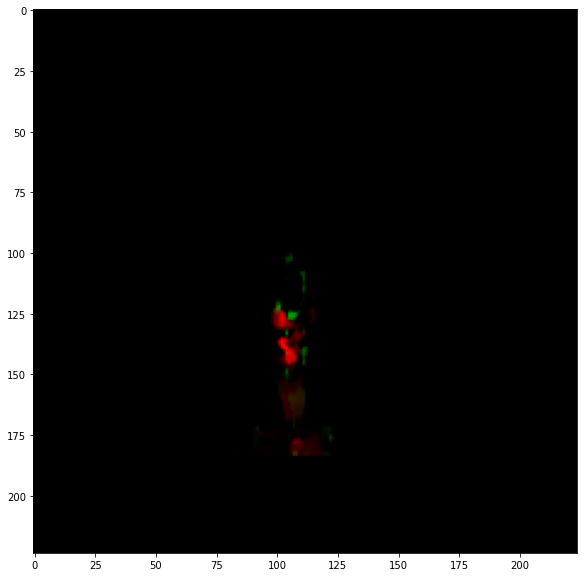

In [25]:
"""fig = plt.figure(figsize=(15,10))
plt.imshow(np.transpose(flowsActual[5], (1,2,0)), interpolation='nearest')
plt.show()"""

out_folder_vis = videoname+'.gif'
visualize_3dflow(flowsActual,out_folder_vis)